In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/')
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/EVA4/S12/annotations')

In [4]:
# Loading json file
with open('annotations_dogs.json') as f:
  data = json.load(f)

In [5]:
images = data['images']
images[0:3]

[{'date_captured': '',
  'file_name': '1.jpg',
  'height': 388,
  'id': 0,
  'license': 1,
  'width': 386},
 {'date_captured': '',
  'file_name': '75c0f6259ba49d729293b9544a067235.jpg',
  'height': 426,
  'id': 1,
  'license': 1,
  'width': 637},
 {'date_captured': '',
  'file_name': '83-833982_lab-dog-images-download.jpg',
  'height': 716,
  'id': 2,
  'license': 1,
  'width': 1000}]

In [6]:
# Creating empty dictionary to store images and annotations details
img_dict = {}

In [7]:
# Storing values of images wrt id
for img in images:
  id = img['id']
  img_dict[str(id)] = {'file_name': img['file_name'],'height' : img['height'], 'width' : img['width']}


img_dict['0']

{'file_name': '1.jpg', 'height': 388, 'width': 386}

In [8]:
annotations = data['annotations']
annotations[0]

{'area': 124166,
 'bbox': [23, 4, 343, 362],
 'category_id': 1,
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [23, 4, 366, 4, 366, 366, 23, 366]}

In [9]:
# Creating an empty list which will be converted to dataframe
annotate = []

In [10]:
a, b, c, d = [140, 47, 923, 1036]

In [11]:
for ant in annotations:
  id = ant['image_id']
  img_height = img_dict[id]['height']
  img_width = img_dict[id]['width']
  img_name = img_dict[id]['file_name']
  bb_x, bb_y, bb_width, bb_height = ant['bbox']
  img_height_norm = img_height/img_height
  img_width_norm = img_width/img_width
  bb_x_norm = bb_x/img_width
  bb_y_norm = bb_y/img_height
  bb_width_norm = bb_width/img_width
  bb_height_norm = bb_height/img_height
  a = {'file_name':img_name, 'img_height':img_height, 'img_width':img_width, 'img_height_norm' : img_height_norm, 'img_width_norm' : img_width_norm,
       'bb_x_norm' : bb_x_norm, 'bb_y_norm':bb_y_norm, 'bb_width_norm' : bb_width_norm, 'bb_height_norm' : bb_height_norm}
  annotate.append(a)

In [12]:
df = pd.DataFrame(annotate)
df.head(3)

,file_name,img_height,img_width,img_height_norm,img_width_norm,bb_x_norm,bb_y_norm,bb_width_norm,bb_height_norm
0,1.jpg,388,386,1.0,1.0,0.059585,0.010309,0.888601,0.932990
1,75c0f6259ba49d729293b9544a067235.jpg,426,637,1.0,1.0,0.202512,0.100939,0.646782,0.748826
2,83-833982_lab-dog-images-download.jpg,716,1000,1.0,1.0,0.195000,0.175978,0.711000,0.722067


In [13]:
df.shape

(50, 9)

In [14]:
df_updated = df[['file_name','bb_width_norm','bb_height_norm']]

### Visualise Bounding Boxes

Visualise the scaled bounding boxes of all the images

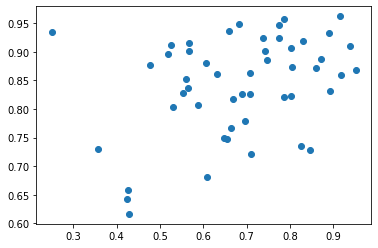

In [15]:
plt.scatter(x=df_updated['bb_width_norm'],y=df_updated['bb_height_norm'])

In [16]:
# Removing the filename column and storing the rest as X for finding optimal number of clusters using k-means clustering
X = df_updated[df_updated.columns[1:]]

### Determine optimal number of clusters

We find the optimal number of clusters using the elbow method using WCSS (inertia property)



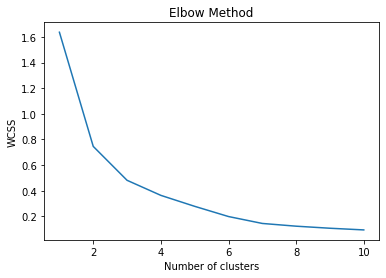

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above we can see that the elbow in curve occurs at 5. So we take k=4.

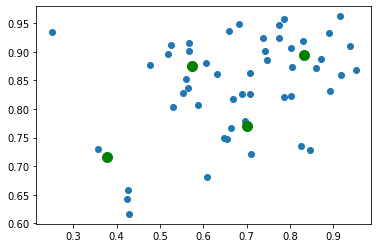

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(x=df_updated['bb_width_norm'],y=df_updated['bb_height_norm'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='green')
plt.show()